# Problema de Clasificación Bank+Marketing
## **Autor**: Brian Sena Simons 
## **Grupo**: 3ºA - A2.


# Introducción al Problema.

Disponemos de un repositorio con la información de una institución bancaria de Portugal. El conjunto de datos está relacionado con las llamadas del equipo de marketing, y el objetivo de la predicción es saber si un cliente realizará un depósito. \\

Es un problema con características multivariantes del area del comercio. Recoge un total de 45.211 instancias de datos ordenadas desde 2008 hasta 2010. Los atributos son de tipo real y hay un total de 17 de ellos. \\

Como vemos con esta descripción estamos ante un problema de clasificación supervisado ya que disponemos de las etiquetas relacionadas a cada caso. La idea será emplear un modelo lineal en "w" para clasificar correctamente el conjunto, para ello utilizaremos distintos modelos y técnicas estudiadas como la regularización. Realizaremos una comprobación del comportamiento mediante la validación cruzada, "K-Fold", y nos quedaremos con el mejor. Todas estas técnicas se irán discutiendo a lo largo del documento a medida que sea necesario.

## Conjunto de Datos.

Según la [página oficial](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). La información que obtenemos de los atributos, o conjunto $\mathcal{X}$, es que tendremos variables como la edad, el trabajo, la educación, día de la semana, número de empleados, la confianza del usuario y entre otros. Como vemos disponemos de un conjunto mezclado de variables de tipo reales y aquellos que son de tipo categórico. Por lo que tendremos que identificar algún tipo de codificación apropiada para estas últimas. La idea será utilizar la técnica de "OneHotEnconding" para las categóricas no-ciclicas, que divide las categorias en binarios de 0 y 1. Ejemplo: Rojo = 1 0 0; Verde = 0 1 0; Azul = 0 0 1 ..
Y para las categorias cíclicas utilizaremos el esquema seno-conseno.

In [244]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Una vez montado el drive, a continuación utilizaremos la librería panda ya utilizada en prácticas anteriores para realizar la lectura de los archivos de tipos "csv" en forma de tabla vectorial.

Una vez leídos, realizaremos una división entre conjunto de test y conjunto de entreno. Y procedemos a preprocesar los datos, verificando el comportamiento de cada atributo, datos faltantes, moda.. con la ayuda de distintas librerías.

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split

otherData = pd.read_csv('/content/drive/MyDrive/datos/bank.csv',delimiter=';')
allData = pd.read_csv('/content/drive/MyDrive/datos/bank-full.csv',delimiter=';')
allData = allData.append(otherData) 
allYdata = allData["y"]
allData = allData.loc[:,allData.columns!="y"]
data, test, ydata, ytest =  train_test_split(allData,allYdata,test_size=0.2,random_state=42)
display(data)
ydata = ydata.map({'no':-1,'yes':1})

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3943,45,services,single,secondary,no,1757,yes,no,cellular,20,apr,1010,3,326,1,other
2791,32,technician,married,secondary,no,782,yes,no,unknown,26,may,116,4,-1,0,unknown
30900,32,services,married,secondary,no,183,yes,no,cellular,9,feb,17,10,-1,0,unknown
44615,34,admin.,single,tertiary,no,625,no,yes,unknown,31,aug,34,1,-1,0,unknown
5757,32,blue-collar,married,secondary,no,358,no,no,unknown,26,may,396,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,jun,2093,1,-1,0,unknown
44732,23,student,single,tertiary,no,508,no,no,cellular,8,sep,210,1,92,1,failure
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,may,239,1,-1,0,unknown
860,33,retired,married,secondary,no,165,no,no,unknown,7,may,111,1,-1,0,unknown


El conjunto $\mathcal{Y}$ es de tipo cadena de caracteres 'yes' ó 'no', lo cambiaremos a los valores -1 y 1. 
Lo primero que haré es transformar el nombre de los meses en números, ya que luego tendremos que transformar esa variable categórica en variable númerica para poder trabajar sobre ella. [Autor del código](https://stackoverflow.com/questions/42684530/convert-a-column-in-a-python-pandas-from-string-month-into-int)

In [246]:
from calendar import month_abbr
lower_ma = [m.lower() for m in month_abbr]

data['month'] = data['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
display(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3943,45,services,single,secondary,no,1757,yes,no,cellular,20,4,1010,3,326,1,other
2791,32,technician,married,secondary,no,782,yes,no,unknown,26,5,116,4,-1,0,unknown
30900,32,services,married,secondary,no,183,yes,no,cellular,9,2,17,10,-1,0,unknown
44615,34,admin.,single,tertiary,no,625,no,yes,unknown,31,8,34,1,-1,0,unknown
5757,32,blue-collar,married,secondary,no,358,no,no,unknown,26,5,396,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,6,2093,1,-1,0,unknown
44732,23,student,single,tertiary,no,508,no,no,cellular,8,9,210,1,92,1,failure
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,5,239,1,-1,0,unknown
860,33,retired,married,secondary,no,165,no,no,unknown,7,5,111,1,-1,0,unknown


# Preprocesado de datos.

Antes de realizar cambios en las variables deberíamos verificar la integridad de los atributos que disponemos, para el ello voy a verificar algunas restricciones importantes, dibujar el histograma y verificar datos como la media, mediana, la desviación y varianza.

Como nuestro objetivo es predecir los casos positivos, lo primero que quiero hacer es verificar la distribución o equilibrio entre los casos.

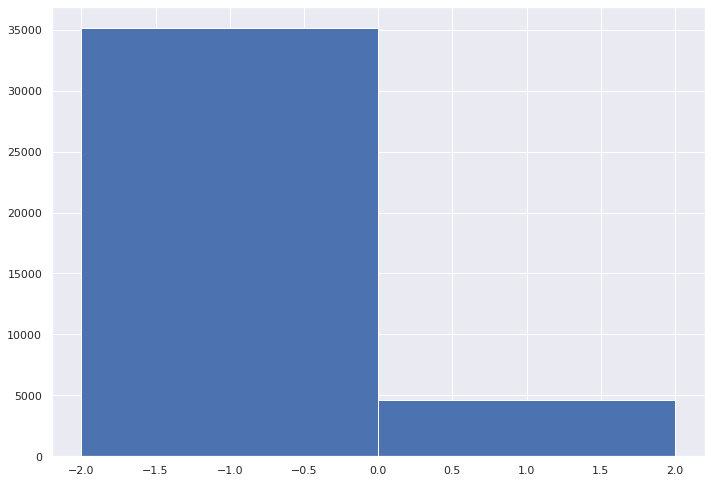

<Figure size 800x640 with 0 Axes>

In [247]:
import matplotlib.pyplot as plt 
plt.hist(ydata,bins=2,range=[-2,2])
plt.figure(dpi=80,figsize=(10,8))
plt.show()

Vemos que tenemos claramente un problema, el desequilibrio de clases es brutal. No sería erróneo esperar que nuestro modelo no fuera capaz de generalizar para los casos positivos y/o que tuviera problemas para clasificarlos. No habría otra manera de arreglar-lo a no ser buscar recoger más información y data sobre el tema. Veremos como se comportan los modelos...

Incluso podríamos utilizar como métrica la de "balanced_accuracy" que nos provee sklearn para mejor elegir los modelos, pero es equivalente a realizar un análisis mediante las curvas ROC y de aprendizaje, además de visualizando la matriz confusa así que seguiré utilizando la "accuracy" común

### Histograma bonito

In [248]:
import matplotlib.pyplot as plt 

def histogram(x,bins,xlabel=""):
  plt.style.use('ggplot')
  fig, ax = plt.subplots(figsize = (10,8))
  if(type(x.values[0])!=str):
    # Plot histogram
    x.plot(kind = "hist", density = True, alpha = 0.65, bins = bins) # change density to true, because KDE uses density
    # Plot KDE
    x.plot(kind = "kde")

        # Quantile lines
    quant_5, quant_25, quant_50, quant_75, quant_95 = x.quantile(0.05), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.95)
    quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
    for i in quants:
        ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",color="blue")
        
    ax.set_xlim(0,100)
    ax.set_xlabel(xlabel) 
    ax.set_ylabel("")
    
    # Annotations
    ax.text(quant_5-.5, 0.012, "5th", size = 10, alpha = 0.8)
    ax.text(quant_25-.25, 0.020, "25th", size = 11, alpha = 0.85)
    ax.text(quant_50-.25, 0.025, "50th", size = 12, alpha = 1)
    ax.text(quant_75-.25, 0.030, "75th", size = 11, alpha = 0.85)
    ax.text(quant_95-.45, 0.036, "95th Percentile", size = 10, alpha =.8)
  else:
    x.value_counts().plot(kind = "bar", alpha = 0.65)
  
  
  # Overall
  ax.grid(False)
  
      # Remove ticks and spines
  ax.tick_params(left = False, bottom = False)
  for ax, spine in ax.spines.items():
      spine.set_visible(False)
      
  plt.show()


## Estudio estadístico de los datos.

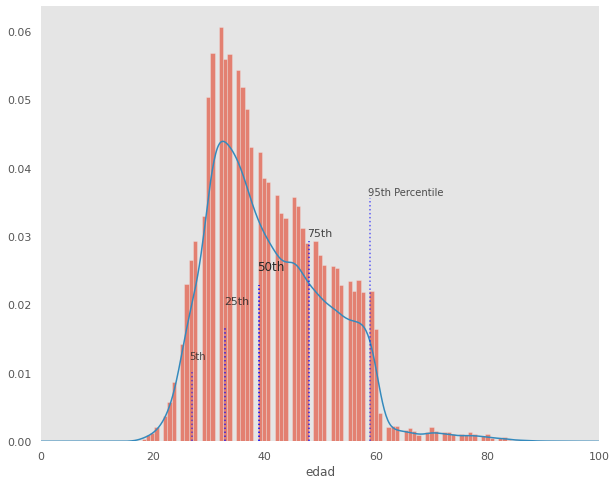

In [249]:
histogram(data["age"],100,xlabel="edad")

Vemos que tenemos muy pocos valores para las edades por encima de los 60, podríamos plantearnos la importancia de mantener esos datos. Sin embargo, este histograma es más bien para verificar el correto funcionamiento de la función y  la integridad de los datos, como vemos, tenemos apenas valores positivos para la edad. 

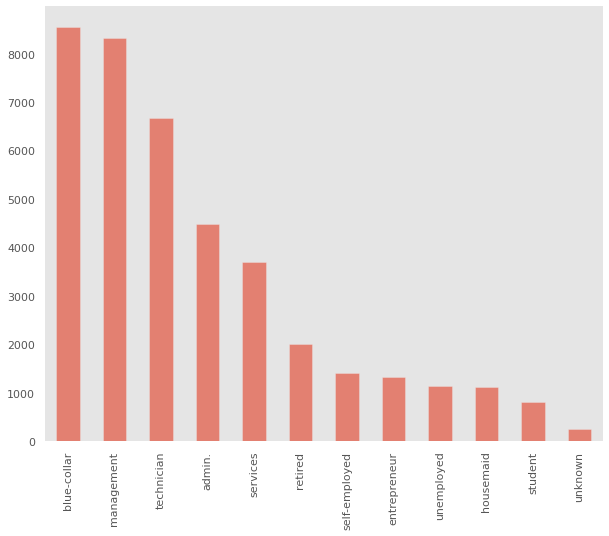

In [250]:
histogram(data["job"],15,xlabel="trabajadores")

Con este histograma categorico vemos que disponemos de valores "desconocidos", "unknown", que seguramente sean "placeholders" que no aporten ningúna información. Vemos además con la primera tabla que otros atributos categóricos disponen del mismo valor. Sería oportuno realizar un estudio y conteo de la proporción para tomar medidas.

In [251]:
import numpy as np 
# Verificamos que las edades son mayor que 0 
def pdStrMiss(data): 
  print("### Verificación de integridad de los datos categóricos #### ")
  lista_faltantes = []
  index_values = []
  for (columnName, columnData) in data.iteritems():
    if(type(columnData[1])==str):
      index_values = np.array(np.where(columnData=="unknown"))
      if(index_values.shape[1]>1):
        lista_faltantes.append([columnName,index_values[0]])
        print("Número de datos faltantes para " + columnName + " : ", index_values.shape[1])
  lista_faltantes = np.array(lista_faltantes,dtype=object)
  return lista_faltantes 
  print("##################################################")
lista = pdStrMiss(data)

### Verificación de integridad de los datos categóricos #### 
Número de datos faltantes para job :  253
Número de datos faltantes para education :  1651
Número de datos faltantes para contact :  11488
Número de datos faltantes para poutcome :  32515


placeholde que más de la mitad de los valores para "poutcome" son placeholders, por lo que podríamos inferir que no tiene sentido utilizar ese atributo para nuestro modelo de aprendizaje ya que no disponemos de suficiente información al respecto. Sin embargo si miramos los valores de etiquetas cuando el valor es desconocido para esa columna y las demás vemos que: 

In [252]:
count = []
for i in range(0,len(lista)):
  yUnk = ydata.index[lista[i][1]]
  count.append(np.array(np.where(ydata[yUnk]==1)[0]).shape[0])
  print("Número de etiquetas positivas en:", lista[i][0] , count[i])

Número de etiquetas positivas en: job 35
Número de etiquetas positivas en: education 237
Número de etiquetas positivas en: contact 827
Número de etiquetas positivas en: poutcome 3370


In [253]:
for i in range(0,len(lista)):
  print("Porcentaje de casos positivos:", count[i]/np.array(np.where(ydata>0)[0]).shape[0])

Porcentaje de casos positivos: 0.007512341704228375
Porcentaje de casos positivos: 0.050869285254346426
Porcentaje de casos positivos: 0.17750590255419618
Porcentaje de casos positivos: 0.7233311869499892


Vemos que el porcentaje de casos positivos cuando el valor de poutcome es nulo es altísimo para mucho de los casos, por lo que haré caso a la base de datos cuando esa indica que no tiene valores nulos para los dos últimos casos y analizaré los otros dos. 

Respecto a los demás valores, tanto para "job" como para "educación" lo que realizaré será imputar los datos. En otras palabras, cambiaré los valores "desconocidos" por la moda de todos los valores. Hago esto debido a que la cantidad de datos faltantes es pequeña en relación a todo el conjunto de entreno. 

In [254]:
import numpy as np
from sklearn.impute import SimpleImputer
job_imputer = SimpleImputer(missing_values="unknown",strategy='most_frequent')
data.job = job_imputer.fit_transform(data["job"].values.reshape(-1,1))
edu_imputer = SimpleImputer(missing_values="unknown",strategy='most_frequent')
data.education = edu_imputer.fit_transform(data["education"].values.reshape(-1,1))

Verificamos que ha realizado cambios sobre nuestros datos: 

In [255]:
nlista = pdStrMiss(data)

### Verificación de integridad de los datos categóricos #### 
Número de datos faltantes para contact :  11488
Número de datos faltantes para poutcome :  32515


Repecto a la columna "contact", al tener el caso de que 10.385 son datos "desconocidos" que es casi 1 tercio del conjunto de datos, voy a mantener ese valor de manera que tengamos otro tipo de "contact" como dato. 

Para verificar la integridad y consistencia de los demás valores númericos que me queda por analizar haré uso de la librería [statistics](https://realpython.com/python-statistics/) ya que además de ayudarnos a calcular la media, desviación, varianza y otros, en caso de que encuentre un valor faltante, nos devolverá NaN. Por lo que mataremos a dos pájaros con una piedra. 

In [256]:
import statistics as st
from scipy.stats import skew 
def pdIntMiss(data): 
  print("### Verificación de integridad de los datos numéricos #### ")
  lista_datos = []
  index_values = []
  for (columnName, columnData) in data.iteritems():
    if(type(columnData[1])!=str and columnName!="day" and columnName!="month"):
      mean = st.mean(columnData)
      var = st.variance(columnData,mean)
      stdev = st.stdev(columnData,mean)
      balance = skew(columnData,bias=False)
      lista_datos.append([columnName,mean,
                          var,
                          stdev,
                          balance])
      print(columnName, "-> Mean: {:.3f}; Var: {:.3f}; Stdev: {:.3f}; Skew: {:.3f}".format(mean,var,stdev,balance))
  lista_datos = np.array(lista_datos,dtype=object)
  print("##################################################")

In [257]:
pdIntMiss(data)

### Verificación de integridad de los datos numéricos #### 
age -> Mean: 40.966; Var: 112.506; Stdev: 10.607; Skew: 0.697
balance -> Mean: 1358.846; Var: 9277664.304; Stdev: 3045.926; Skew: 8.660
duration -> Mean: 258.907; Var: 66210.445; Stdev: 257.314; Skew: 3.117
campaign -> Mean: 2.774; Var: 9.816; Stdev: 3.133; Skew: 4.976
pdays -> Mean: 40.090; Var: 9951.994; Stdev: 99.760; Skew: 2.605
previous -> Mean: 0.576; Var: 5.357; Stdev: 2.314; Skew: 45.835
##################################################


Cabe destacar un par de cosas. La varianza de "balance" es tremendamente alta, a igual que "duration" y "pdays". Y "previous" es bastante asimétrico con predominancia a la derecha del conjunto de datos, lo que indica cierto desequilibrio. Verifiquemos estos conjuntos de datos más a fondo 

In [258]:
print("Investigando los valores de la columna \"previous\"")
print("Tipo de valores:", data["previous"].values)
print("### Verificamos el número de valores distintos de cero ###")
count = np.count_nonzero(data["previous"]>0)
print("Total diferente de cero:", count , "Porcentage: ", count/len(data["previous"]))

Investigando los valores de la columna "previous"
Tipo de valores: [1 0 0 ... 0 0 0]
### Verificamos el número de valores distintos de cero ###
Total diferente de cero: 7273 Porcentage:  0.18280759080055298


Sería interesante aquí plantearse quitar la columna "previous" ya que la mayoría de las veces no aporta ningúna información o eso aparenta, si lo hicieramos también tendríamos que hacerlo sobre "pdays" ya que están relacionadas. Respecto a la "duration" según la página oficial del conjunto de datos, es una columna muy importante ya que afecta directamente la etiqueta, si el número es 0 es directamente 'no' la salida. Y por último, verifiquemos los demás: 

### Estudiando atributo balance ### 
Valor mínimo: -6847 Mediana: 445.0 Valor máximo: 102127
#######################################


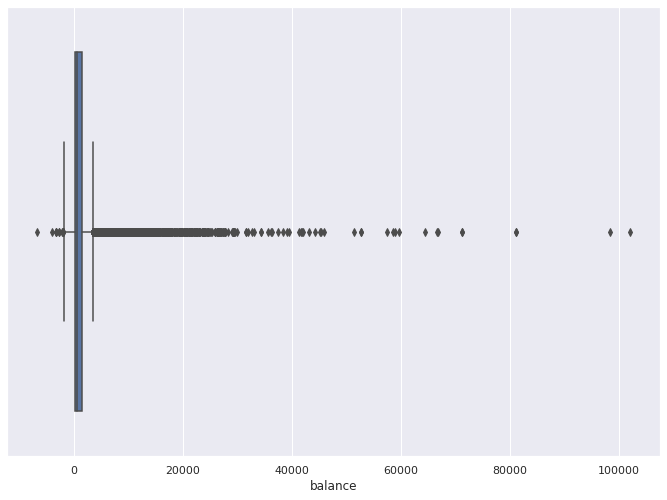

In [259]:
import seaborn as sns 
max_bal = data["balance"].max()
min_bal = data["balance"].min()
median_bal = data["balance"].median()
print("### Estudiando atributo balance ### " )
print("Valor mínimo:",min_bal,"Mediana:",median_bal,"Valor máximo:",max_bal) 
print("#######################################")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=data["balance"])
plt.show()

Vemos que tenemos unos cuántos "outliers" o valores que están muy distantes de los valores definidos por los cuartiles. Como yo creo que es oportuno para nuestro sistema saber sobre la cuantidad de dinero que dispone un cliente para poder inferir, voy a seguir indagando sobre esos valores. [Finding outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

In [260]:
from scipy import stats
Threshold = 3
z_bal = np.abs(stats.zscore(data["balance"]))
bal_out = np.array(np.where(z_bal>Threshold)[0])
print("Número de outliers:" ,bal_out.shape[0])

Número de outliers: 663


In [261]:
z_prev = np.abs(stats.zscore(data["previous"]))
prev_out = np.array(np.where(z_prev>Threshold)[0])
print("Número de outliers:", prev_out.shape[0])

Número de outliers: 503


In [262]:
z_age = np.abs(stats.zscore(data["age"]))
age_out = np.array(np.where(z_age>Threshold)[0])
print("Número de outliers:", age_out.shape[0])

Número de outliers: 351


In [263]:
z_dur = np.abs(stats.zscore(data["duration"]))
dur_out = np.array(np.where(z_dur>Threshold)[0])
print("Número de outliers:", dur_out.shape[0])

Número de outliers: 846


In [264]:
z_cam = np.abs(stats.zscore(data["campaign"]))
cam_out = np.array(np.where(z_cam>Threshold)[0])
print("Número de outliers:", cam_out.shape[0])

Número de outliers: 756


Vemos que en el peor de los casos tendríamos que eliminar más de 2.000 datos de nuestro conjunto de entreno. Pero antes de hacerlo podemos mirar si las filas coinciden entre ellas. Podemos incluso analizar como se vería el boxplot sin los outliers: (La razón por la que he utilizado un Threshold=3 aúnque como veamos no quita muchos puntos fuera de los cuartiles, es debido a que como indica una [página estadistica](https://statisticsbyjim.com/basics/remove-outliers/), no podemos quitar toda la variación de nuestro conjunto de datos, sobre todo si es parte del problema y algo con lo que podría depararse nuestro modelo fuera de la muestra).

Pero como hemos discutido en prácticas, no solamente debemos mirar los outliers de manera isolada, si no que también debemos estudiarlos multidimensionalmente:
[Multivariate outlier detection](https://towardsdatascience.com/multi-variate-outlier-detection-in-python-e900a338da10)

In [265]:
from sklearn.ensemble import IsolationForest
colNames = ["balance","previous","age","duration","campaign"]
isf = IsolationForest(n_estimators=100,random_state=42,contamination=0.02)
preds = isf.fit_predict(data[colNames])
ndata  = pd.DataFrame(data=preds,columns=["iso_forest_outliers"]) 
ndata["iso_forest_outliers"] = ndata["iso_forest_outliers"].astype(str)
ndata["iso_forest_scores"] = isf.decision_function(data[colNames])
print(ndata["iso_forest_outliers"].value_counts())

1     38989
-1      796
Name: iso_forest_outliers, dtype: int64


In [266]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
pred = lof.fit_predict(data[colNames])
ndata["lof_outliers"] = pred.astype(str)
ndata["lof_scores"] = lof.negative_outlier_factor_ 
print(ndata["lof_outliers"].value_counts())

1     39236
-1      549
Name: lof_outliers, dtype: int64


Vemos que acorde con estos dos métodos, solamente en realidad existe alrededor de 500 verdaderos outliers, que es un valor mucho mejor al primer 2.000. Pero seguiremos visualizando el comportamiento de cada atributo. Por ejemplo, verifiquemos el comportamiento del box-plot de balance sin los outliers.

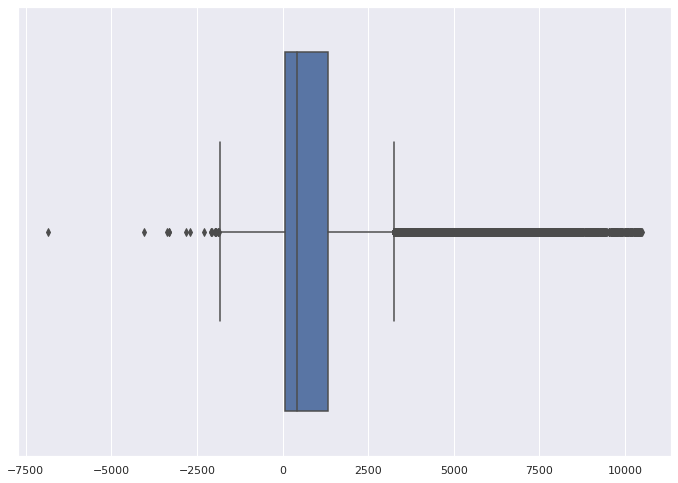

In [267]:
sns.boxplot(x=data["balance"].values[z_bal<Threshold])
plt.show()

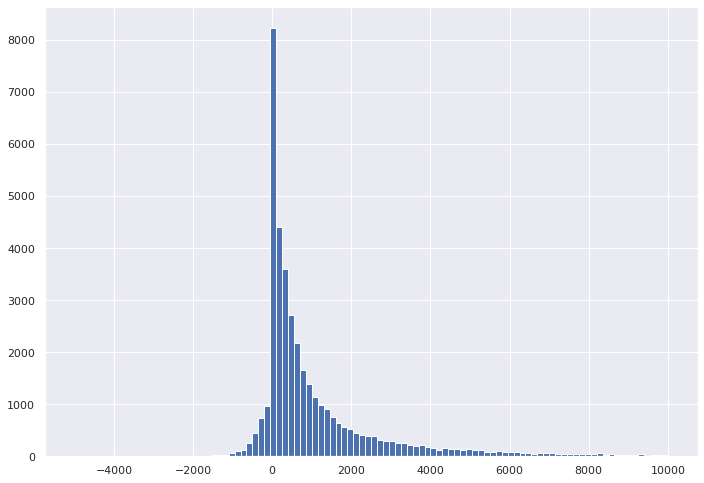

<Figure size 800x640 with 0 Axes>

In [268]:
plt.hist(data.balance.values,bins=100,range=[-5000,10000])
plt.figure(dpi=80,figsize=(10,8))
plt.show()

Vemos que si quitaramos los outliers de balance, nos acercaríamos más a como se comporta una campana gaussiana. Y utilizamos el threshold igual a 3 ya que convendría permitir cierta varianza en nuestros datos debido a que el atributo "balance" también varia a menudo fuera de la muestra, es algo característico del problema. 

A la columna "duration" la voy a borrar, ya que aunque es muy importante según la documentación, nos indica que para tener un modelo predictivo realística deberíamos quitarla ya que no sabemos la duración antes de realizar la llamada. Ahora me gustaría analizar el efecto que tiene "previous" sobre las  etiquetas cuándo vale 0 versus un número positivo.

In [269]:
data.drop("duration",axis=1,inplace=True)

In [270]:
yPos_prev = ydata.values[data["previous"]>0]
yNeg_prev = ydata.values[data["previous"]==0]
yPos_mean = yPos_prev.mean()
yPos_var = yPos_prev.var()
yPos_std = yPos_prev.std()
yNeg_mean = yNeg_prev.mean()
yNeg_var = yNeg_prev.var()
yNeg_std = yNeg_prev.std()
print("### Estudio de relación ###")
print("Para valores iguales a cero la media es {:.4f}, la var {:.4f} y std {:.4f}".
      format(yNeg_mean,yNeg_var,yNeg_std))
print("Para valores mayores a cero la media es {:.4f}, la var {:.4f} y std {:.4f}".
      format(yPos_mean,yPos_var,yPos_std))
print("###########################")

### Estudio de relación ###
Para valores iguales a cero la media es -0.8177, la var 0.3313 y std 0.5756
Para valores mayores a cero la media es -0.5336, la var 0.7153 y std 0.8457
###########################


In [271]:
yPos_prev = ydata.values[data["pdays"]>=0]
yNeg_prev = ydata.values[data["pdays"]<0]
yPos_mean = yPos_prev.mean()
yPos_var = yPos_prev.var()
yPos_std = yPos_prev.std()
yNeg_mean = yNeg_prev.mean()
yNeg_var = yNeg_prev.var()
yNeg_std = yNeg_prev.std()
print("### Estudio de relación ###")
print("Para valores menores a cero la media es {:.4f}, la var {:.4f} y std {:.4f}".
      format(yNeg_mean,yNeg_var,yNeg_std))
print("Para valores mayor/igual a cero la media es {:.4f}, la var {:.4f} y std {:.4f}".
      format(yPos_mean,yPos_var,yPos_std))
print("###########################")

### Estudio de relación ###
Para valores menores a cero la media es -0.8177, la var 0.3313 y std 0.5756
Para valores mayor/igual a cero la media es -0.5336, la var 0.7153 y std 0.8457
###########################


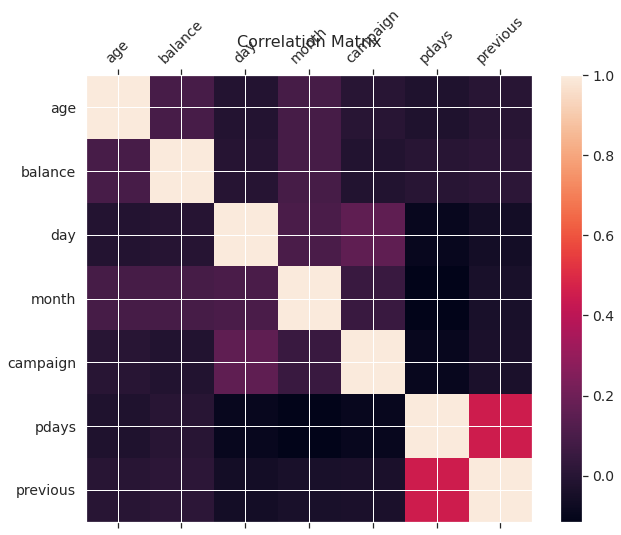

In [272]:
import matplotlib.pyplot as plt
df_close = data._get_numeric_data()
f = plt.figure(figsize=(10, 8))
plt.matshow(df_close.corr(), fignum=f.number)
plt.xticks(range(df_close.shape[1]), df_close.columns, fontsize=14,rotation=45)
plt.yticks(range(df_close.shape[1]), df_close.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Vemos que aparenta ser que cuando tenmos valores positivos de la columna "previous", también en "pdays" ya que ambas están muy correlacionadas, obtenemos mayor cantidad de etiquetas positivas (notar cambio en la media y eso que solo disponemos de 6000 datos positivos). 
Por lo que a estas dos columnas no las tocaré tampoco. 

Respecto a la columna "age" Recurriré al mismo argumento que la columna "balance", es una variabilidad existente en el problema, tanto dentro como fuera de la muestra. Por lo que no veo oportuno quitar los outliers ya que no son tan extremistas como en "balance".

Por último, lo que nos quedaría por verificar es la columna "campaign".

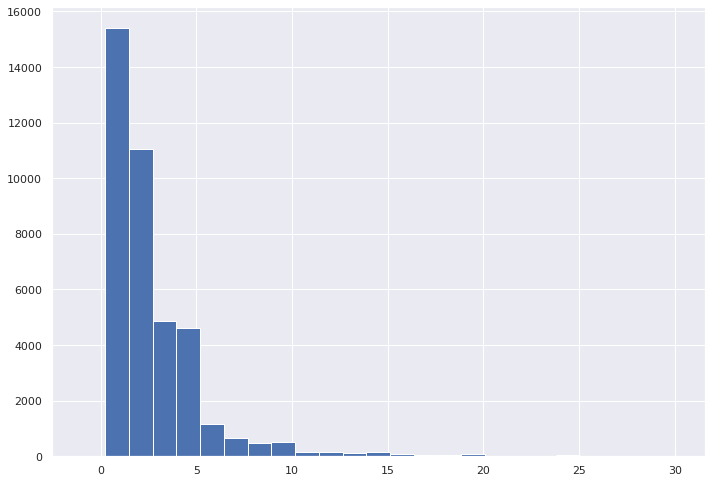

<Figure size 800x640 with 0 Axes>

In [273]:
plt.hist(data.campaign.values,bins=25,range=[-1,30])
plt.figure(dpi=80,figsize=(10,8))
plt.show()

Antes de tomar una decision me gustaría ver la cantidad de etiquetas positivas que perdería si elimináramos todos los supuestos outliers: 

In [274]:
outliers_index = np.array(np.where(ndata["lof_outliers"].astype(int)<1)[0])
print("Number of positive values in multivariate analisis:", np.array(np.where(ydata.values[outliers_index]>=1)[0]).shape[0])
print("Number of positive values in campaign outliers positions:" ,np.array(np.where(ydata.values[cam_out]>=1)[0]).shape[0])
print("Number of positive values in balance outliers positions:" ,np.array(np.where(ydata.values[bal_out]>=1)[0]).shape[0])

Number of positive values in multivariate analisis: 101
Number of positive values in campaign outliers positions: 24
Number of positive values in balance outliers positions: 104


Como aparenta ser que no vamos a perder una gran proporción de ellos y encima nuestro modelo teóricamente aprenderá mejor del conjunto de datos gracias a la disminución de ruido, creo que sería oportuno quitar esos datos: 

In [275]:
print("Before removing multivariate outliers: ",len(data),outliers_index.shape[0])
data = data.drop(data.index[outliers_index])
ydata = ydata.drop(ydata.index[outliers_index])
print("After removing multivariate outliers: ", len(data),len(ydata))

Before removing multivariate outliers:  39785 549
After removing multivariate outliers:  39162 39162


In [276]:
z_cam = np.abs(stats.zscore(data["campaign"]))
cam_out = np.array(np.where(z_cam>Threshold)[0])
print("Before removing campaign outliers: ",len(data),cam_out.shape[0])
data = data.drop(data.index[cam_out])
ydata = ydata.drop(ydata.index[cam_out])
print("After removing campaign outliers: ", len(data),len(ydata))

Before removing campaign outliers:  39162 795
After removing campaign outliers:  38278 38278


In [277]:
z_bal = np.abs(stats.zscore(data["balance"]))
bal_out = np.array(np.where(z_bal>Threshold)[0])

In [278]:
print("Before removing balance outliers: ",len(data),bal_out.shape[0])
data = data.drop(data.index[bal_out])
ydata = ydata.drop(ydata.index[bal_out])
print("After removing balance outliers: ", len(data),len(ydata))

Before removing balance outliers:  38278 715
After removing balance outliers:  37488 37488


## Transformaciones de datos.

Empezaremos a realizar cambios sobre las variables categóricas y veremos como cresce nuestro número de atributos. Lo primero que tenemos que hacer antes es transformar aquellos datos de tipo temporal en valores númericos para luego ir trabajando sobre ellos. He leido la documentación de [sklearn ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) y he aprendido sobre los [OneHotEncode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehot#sklearn.preprocessing.OneHotEncoder) y [StandardScaler](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html). El OneHotEncoder realiza el cambio a valores binarios como mencionado anteriormente. El StandardScaler normaliza el conjunto de datos utilizando la media y la varianza del atributo tal que tenemos $\frac{x-u}{v}$ siendo u la media.

In [279]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

numeric_features = ['age','balance','campaign','previous','pdays']
scaler = ColumnTransformer(
    transformers=[
      ("norm",preprocessing.StandardScaler(),numeric_features)
    ],
    remainder='passthrough'
)
Scltransformed = scaler.fit_transform(data)
cols = scaler.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tdata = pd.DataFrame(data=Scltransformed,columns=cols)
display(tdata) 

,age,balance,campaign,previous,pdays,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,0.398792,0.417243,0.313262,0.250009,2.828465,services,single,secondary,no,yes,no,cellular,20,4,other
1,-0.846699,-0.17218,0.853122,-0.322173,-0.417253,technician,married,secondary,no,yes,no,unknown,26,5,unknown
2,-0.846699,-0.534297,4.09228,-0.322173,-0.417253,services,married,secondary,no,yes,no,cellular,9,2,unknown
3,-0.655085,-0.267092,-0.766457,-0.322173,-0.417253,admin.,single,tertiary,no,no,yes,unknown,31,8,unknown
4,-0.846699,-0.428503,-0.766457,-0.322173,-0.417253,blue-collar,married,secondary,no,no,no,unknown,26,5,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37483,0.302985,-0.004723,-0.766457,-0.322173,-0.417253,housemaid,single,primary,no,no,no,unknown,18,6,unknown
37484,-1.708963,-0.337823,-0.766457,0.250009,0.505841,student,single,tertiary,no,no,no,cellular,8,9,failure
37485,-0.655085,0.151247,-0.766457,-0.322173,-0.417253,technician,divorced,tertiary,no,yes,no,cellular,15,5,unknown
37486,-0.750892,-0.545179,-0.766457,-0.322173,-0.417253,retired,married,secondary,no,no,no,unknown,7,5,unknown


Vemos que se nos ha cambiado de orden las columnas, pero eso es irrelevante para nuestro modelo. Procederemos entonces a transformar las variables categoricas no-cíclicas: 

In [280]:
# categorical_oneHot = ['job','marital','education','default','housing','loan','contact']
categorical_oneHot = ['job','marital','education','default','housing','loan','contact','poutcome']
OneHotEncodingColumns = ColumnTransformer(
    transformers=[
      ("cat", preprocessing.OneHotEncoder(),categorical_oneHot)
    ],
    remainder='passthrough')

Ohetransformed = OneHotEncodingColumns.fit_transform(tdata)
cols = OneHotEncodingColumns.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tdata = pd.DataFrame(data=Ohetransformed,columns=cols)
display(tdata) 

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,campaign,previous,pdays,day,month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.398792,0.417243,0.313262,0.250009,2.828465,20,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.846699,-0.17218,0.853122,-0.322173,-0.417253,26,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.846699,-0.534297,4.09228,-0.322173,-0.417253,9,2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.655085,-0.267092,-0.766457,-0.322173,-0.417253,31,8
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.846699,-0.428503,-0.766457,-0.322173,-0.417253,26,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37483,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.302985,-0.004723,-0.766457,-0.322173,-0.417253,18,6
37484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-1.708963,-0.337823,-0.766457,0.250009,0.505841,8,9
37485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.655085,0.151247,-0.766457,-0.322173,-0.417253,15,5
37486,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.750892,-0.545179,-0.766457,-0.322173,-0.417253,7,5


Por último, nos quedaría por analizar las variables cíclicas. Tras la lectura de la [documentación sklearn](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#trigonometric-features) para la transformación de datos de tipo temporal, he optado por utilizar el siguiente pipeline de transformaciones: 

In [281]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def sin_transformer(period):
  return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
  return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

cyclic_cossin_transformer = ColumnTransformer(
  transformers=[
    ("day-sin", sin_transformer(31),["day"]),
    ("day-cos", cos_transformer(31),["day"]),
    ("month-sin", sin_transformer(12),["month"]),
    ("month-cos", cos_transformer(12),["month"])
  ], 
  remainder='passthrough'
)

tdata.day = tdata.day.values.astype(float)
tdata.month = tdata.month.values.astype(float)
Cctransformed = cyclic_cossin_transformer.fit_transform(tdata)
cols = np.delete(cols,-1) 
cols = np.delete(cols,-1) 
cols = np.insert(cols,0,["day-sin","day-cos","month-sin","month-cos"])
tdata = pd.DataFrame(data=Cctransformed,columns=cols)
display(tdata) 

,day-sin,day-cos,month-sin,month-cos,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,campaign,previous,pdays
0,-0.790776,-0.612106,0.866025,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.398792,0.417243,0.313262,0.250009,2.828465
1,-0.848644,0.528964,0.5,-0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.846699,-0.17218,0.853122,-0.322173,-0.417253
2,0.968077,-0.250653,0.866025,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.846699,-0.534297,4.09228,-0.322173,-0.417253
3,-0.0,1.0,-0.866025,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.655085,-0.267092,-0.766457,-0.322173,-0.417253
4,-0.848644,0.528964,0.5,-0.866025,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.846699,-0.428503,-0.766457,-0.322173,-0.417253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37483,-0.485302,-0.874347,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.302985,-0.004723,-0.766457,-0.322173,-0.417253
37484,0.998717,-0.050649,-1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.708963,-0.337823,-0.766457,0.250009,0.505841
37485,0.101168,-0.994869,0.5,-0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.655085,0.151247,-0.766457,-0.322173,-0.417253
37486,0.988468,0.151428,0.5,-0.866025,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.750892,-0.545179,-0.766457,-0.322173,-0.417253


Teóricamente no hacia falta ir visualizando los cambios, de hecho, podríamos haber simplesmente definido un Pipeline con todas las transformaciones y luego pasarlas al modelo que vamos a entrenar, pero este ejercicio me ha servido para entender mejor como funciona la librería sklearn y sus funciones de preprocesado de datos.

El nuevo conjunto de datos que hemos obtenido consiste de un total de 37.488 instancias y 39 columnas en contra de los 39785×16 al empezar. Ahora que hemos terminado de analizar los datos, podemos hablar de los modelos que vayamos a utilizar:  

## Transformación de los datos del conjunto de test

Es importante recordar que tenemos que utilizar las mismas transformaciones que hemos realizado sobre el conjunto de entreno sobre el conjunto de test. Para ello lo que tenemos que hacer es volver a utilizar los mismos transformadores que hemos utilizado anteriormente.

In [282]:
display(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
40178,39,management,married,tertiary,no,1241,yes,no,cellular,5,jun,138,2,-1,0,unknown
18551,31,blue-collar,married,secondary,no,1030,yes,no,cellular,31,jul,180,5,-1,0,unknown
12486,41,technician,married,secondary,no,-147,no,yes,unknown,1,jul,130,1,-1,0,unknown
31102,62,management,divorced,tertiary,no,5943,no,no,telephone,17,feb,196,4,-1,0,unknown
3309,28,technician,single,secondary,no,618,yes,no,cellular,7,may,281,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24114,38,admin.,single,secondary,no,2470,no,no,telephone,31,oct,227,1,-1,0,unknown
30367,60,retired,married,tertiary,no,6684,yes,yes,cellular,5,feb,173,1,-1,0,unknown
2909,39,admin.,married,secondary,no,406,no,no,cellular,30,jul,253,5,-1,0,unknown
17523,26,blue-collar,single,primary,yes,344,no,yes,cellular,29,jul,62,4,-1,0,unknown


Quitamos la columna "poutcome" y convertimos los meses a valores enteros.
Además pasamos las etiquetas a valor -1 y 1.

In [283]:
# test.drop("poutcome",axis=1,inplace=True)
test['month'] = test['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
ytest = ytest.map({'no':-1,'yes':1})

Imputamos los datos faltantes. OJO, aquí la diferencia recae en que utilizamos la función ".transform" y no ".fit_transform". Básicamente lo que eso indica es que utilize la moda aprendida del conjunto de entreno y la utilize aquí también.

In [284]:
test.job = job_imputer.transform(test["job"].values.reshape(-1,1))
test.education = edu_imputer.transform(test["education"].values.reshape(-1,1))

Aquí lo mismo, utilizamos ".transform" para indicar que las transformaciones deben realizarse seguiendo la media y varianza del conjunto de entreno. Así evitamos contaminar los datos y afectar lo aprendido, ya que si aprendimos sobre ciertas condiciones y distribuciones, deberíamos normalizar los nuevos datos a la misma para obtener el funcionamiento real. 

In [285]:
tScltransformed = scaler.transform(test)
cols = scaler.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tTest = pd.DataFrame(data=tScltransformed,columns=cols)

In [286]:
tOhetransformed = OneHotEncodingColumns.transform(tTest)
cols = OneHotEncodingColumns.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tTest = pd.DataFrame(data=tOhetransformed,columns=cols)

In [287]:
tTest.day = tTest.day.values.astype(float)
tTest.month = tTest.month.values.astype(float)
tCctransformed = cyclic_cossin_transformer.transform(tTest)
cols = np.delete(cols,-1) 
cols = np.delete(cols,-1) 
cols = np.insert(cols,0,["day-sin","day-cos","month-sin","month-cos"])
tTest = pd.DataFrame(data=tCctransformed,columns=cols)

Ahora que tenemos el conjunto de test que necesitamos para verificar el comportamiento de todos los modelos, podemos por ejemplo analizar el funcionamiento de regresión logística sobre ese conjunto de datos. 

# Discusión de Modelos 

Como hemos introducido al principio de este documento, estudiaremos modelos lineales sobre este conjunto de datos. Para evitar tener que implementar-los yo y tener una múltitud de fallos, nos ayudaremos de la librería sklearn como hemos estado haciendo. 

Según la página de [modelos lineales](https://scikit-learn.org/stable/modules/linear_model.html) tenemos una multitud de métodos con los que experimentar, para este ejercicio utilizaré los métodos visto en clase como la regresión logística, también emplearé el perceptron, luego utilizaré el RidgeClassifier y el SGDClassifier. (todos modelos lineales).  

## Regresión logística

### Introducción teórica y sobre hiperparámetros.

[Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) Podemos verificar los parámetros del modelo y como utilizar-lo. Lo principal que necesitamos saber es que utiliza regularización L2 por defecto, que es la que utilizaré entre todos los modelos ya que creo que nuestro conjunto de datos tampoco es que tenga tantos parámetros.

La diferencia entre L1 y L2 es que L2 utiliza como restricción de regularización que la suma del cuadrado de los pesos sea menor que un valor. Y L1 utiliza la suma del valor absoluto de los pesos. La segunda termina forzando a que algunos pesos se vayan a cero reduciendo la complejidad del problema, pero como tampoco tenemos muchos atributos, no necesitamos una solución más pequeña, si no que preferimos obtener mejores resultados, utilizaré L2.

Además tenemos que especificar la "fuerza" de la regularización, para ello tiene un parámetro "C" que por defecto está a 1. Nosotros probaremos una escala desde 0.1 a 1 de longitud 5. Las demás características la dejaremos por defecto, como lo es el "solver" que utiliza, el criterio de parada "tol" y entre otros.  

La métrica del error que vamos a utilizar son varias, pero la idea es maximizar la curva ROC ya que el objetivo es obtener el mejor número de aciertos respecto a los clientes que realmente van a realizar un depósito. 

De teoría sabemos que la función de pérdida que utiliza la regresión logística es que tendremos una función $ \sigma (f(x)) = \frac{1}{1+e^{-f(x)}}$ 
y además  
$\sigma (f(x_i)) = \begin{cases} \ge 0.5 & y_i = +1 \\ < 0.5 & y_i = -1 \end{cases} $ 

La salida está acotada entre 0 y 1, se interpreta en términos probabilísticos.
La transformación del gradiente sale de tomar $\frac{-1}{N}ln(\cdot)$ de $L_s(h)$, la máxima verosimilitud de la función. Este sería:
$ \nabla E_{in} = \frac{-1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^t(t)x_n}}$


#### Función de sklearn para printear resultados

In [288]:
def report(results, key,top, n_top=3):
    for i in range(1, n_top + 1):
      candidates = np.flatnonzero(results["rank_test_"+top] == i )
      for candidate in candidates: 
        print("Model with rank: {0}".format(results["rank_test_"+key][candidate]))
        print(
            "Mean " + key + " score: {0:.3f} (std: {1:.3f})".format(
                results["mean_test_"+key][candidate],
                results["std_test_"+key][candidate],
            )
        )
        print("Parameters: {0}".format(results["params"][candidate]))
        print("")

### Implementación del modelo LR

Como hemos dicho, vamos a utilizar la validación cruzada para medir el rendimiento de nuestros modelos y elegir hiperparámetros. La validación cruzada consiste en sobre el conjunto de entrenamiento dividir el conjunto en dos subconjuntos, uno utilizado para entrenar y el otro para validar.

Además, ese conjunto no es estático. Es decir, vamos ir cambiando el conjunto de validación - entreno K veces. Imaginese como si cogemos los últimos 20%, y luego vamos desplazando ese 20% hacía el 0% tal que primeramente tengamos (0,80%) de entreno, luego (0-60%,80-100%), luego (0-40%,60-100%) y así....

La razón por la cual utilizamos la validación cruzada es por la necesidad de ir estimando el comportamiento de nuestro modelo sobre distintas distribuciones de datos "fuera de la muestra", dónde además entrenamos sobre distintas distribuciones a la vez. Según estudiado en teoría, la validación cruzada es un buen estimador del comportamiento del modelo fuera de la muestra. 

Para obtener los resultados, cogeremos la media de los valores obtenidos en validación.

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lrm = LogisticRegression(random_state=0)
Cs = np.linspace(0.1,2,10)
scoring = {"AUC":"roc_auc","Accuracy":"accuracy","Precision":"precision","F1":"f1"}
Lr_parameters = {'C':Cs}
cv = 5
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
lr_clf = GridSearchCV(
    lrm,
    Lr_parameters,
    cv=cv,
    scoring=scoring,
    refit="AUC",
    # return_train_score=True,
    n_jobs=2,
) 
#scores = cross_val_score(lrm,tdata,ydata,scoring='accuracy',cv=5)
lr_clf.fit(tdata,ydata)
lr_results = lr_clf.cv_results_

In [290]:
def printMetrics(results,top):
  for key in results.keys():
    index = key.find('test')
    if index>0 and key.find('split0')>=0 and key.find('mean')<0 and key.find('std')<0 and key.find('rank')<0:
      report(results,key[index+5:],top,n_top=1)
printMetrics(lr_results,"AUC")

Model with rank: 1
Mean AUC score: 0.749 (std: 0.010)
Parameters: {'C': 0.1}

Model with rank: 9
Mean Accuracy score: 0.892 (std: 0.002)
Parameters: {'C': 0.1}

Model with rank: 1
Mean Precision score: 0.675 (std: 0.030)
Parameters: {'C': 0.1}

Model with rank: 10
Mean F1 score: 0.266 (std: 0.019)
Parameters: {'C': 0.1}



Al haber priorizado ROC vemos que también obtuvimos el modelo con mejor precisión para el mismo hiperparámetro, por lo que las cosas aparentan ir bien incluso cuando nuestro modelo pierde en las otras dos métricas.

Ya que estamos utilizando métricas que, tanto ROC como la precisión, lidian con el desequilibrio de clases cuando queremos acertar aquello que menos presente esta.

También habría que verificar si el rango realmente cambia, ya que igual nos indica que se obtuvo una mejor media con otro hiperparámetro cuando el resultado puede ser el mismo: 

In [291]:
report(lr_results,"F1","F1",n_top=3)

Model with rank: 1
Mean F1 score: 0.270 (std: 0.018)
Parameters: {'C': 1.788888888888889}

Model with rank: 1
Mean F1 score: 0.270 (std: 0.018)
Parameters: {'C': 2.0}

Model with rank: 3
Mean F1 score: 0.269 (std: 0.018)
Parameters: {'C': 1.1555555555555557}

Model with rank: 3
Mean F1 score: 0.269 (std: 0.018)
Parameters: {'C': 1.3666666666666667}



Vemos que la diferencia entre rangos es mínima al parecer, de esta manera asumo que el mejor valor para el hiperparámetro C es 0.1. Y ese será nuestro modelo final para regresión logística. 

### Estimador aleatorio y su comportamiento 

Para ello, como utilizo muchas funcionalidades de la librería sklearn, he sacado una sonrisa cuando leyendo la documentación me deparé con el hecho de posee ya implementado una función para ello, que predice de forma [aleatoria](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html):

In [292]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
dummy_clf = DummyClassifier(strategy="most_frequent")
cv_results = cross_validate(dummy_clf,tdata,ydata,cv=cv,scoring=scoring)

In [293]:
display(cv_results)

{'fit_time': array([0.05776525, 0.03750491, 0.0380969 , 0.0377996 , 0.03772616]),
 'score_time': array([0.01034117, 0.0103662 , 0.01870823, 0.00982332, 0.00988936]),
 'test_AUC': array([0.5, 0.5, 0.5, 0.5, 0.5]),
 'test_Accuracy': array([0.88236863, 0.88236863, 0.88236863, 0.88235294, 0.88235294]),
 'test_F1': array([0., 0., 0., 0., 0.]),
 'test_Precision': array([0., 0., 0., 0., 0.])}

Vemos claramente que nuestro AUC es del 50%, que corresponde a básicamente tirar una moneda al aire al predecir. Ese valor es bastante elevado para el método de coger la etiqueta más frecuente debido a la distribución de los datos. Pero como vemos para los valores....

Se acerca mucho a la accuracy de regresión logística, el problema es que 
la idea de este problema es identificar los casos positivos, no los negativos. 

Así que a priori, nuestro modelo anterior mejora las predicciones con el conjunto de entreno que disponemos.

Un "rule of thumb" es que un clasificador es considerado malo si tiene un AuC menor del 70-75%. Como vemos estamos rondando el 50%. Hay un diferencia tremenda respecto a nuestro modelo de regresión logística. No cumplimos con el objetivo de decir cuando un cliente aceptaría, sin embargo, con el modelo anterior muchas veces acertabamos. 

Aquí se nota claramente la diferencia en calidad entre los modelos.

## Perceptrón

### Introducción Teórica PLA

El perceptrón también lo estudiamos en la práctica anterior.

El perceptron en aprendizaje automático es un algoritmo de aprendizaje supervisado de clasificación binaria. El clasificador nos indica a traves de una función si unos datos de entrada pertenecen o no a una clase.  En un sentido moderno el perceptron es un algoritmo denominado de "funcion de umbral" que mapea los valores reales "x" en valores binarios como sigue:
$f(x) = \begin{cases} 1 & if \; w\cdot x + b > 0, \\ 0 & otherwise \end{cases}$

El algoritmo del perceptron no termina si el conjunto de datos de entrenamiento no es linealmente separable. Lo que haremos aquí es imponer el parámetro de "EarlyStopping" de sklearn que verifica si nuestro modelo está mejorando sobre el conjunto de validación y básicamente simular el algoritmo Pocket-PLA.

El proceso de aprendizaje ocurre cuando nos equivocamos, en ese caso lo que haremos es "mover" la recta que delimita las clases tal que acierte para el punto equivocado. $ w = w + yx \; if \; h(x)!=f(x) $ 

### Implementación PLA

Aplicaremos la misma regularización para que la comparación entre los algoritmos sean equivalente. A diferencia de la regresión logística, aquí tenemos que especificar una constante $\alpha$ que multiplica el término de la regularización, experimentaremos con esos valores a igual que en el anterior.

In [294]:
from sklearn.linear_model import Perceptron

pla = Perceptron(penalty='l2',early_stopping=True,random_state=0)
alphas = np.linspace(0.0001,1,10)
Pla_parameters = {'alpha':alphas}
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
scoring = {"AUC":"roc_auc","Accuracy":"accuracy","Precision":"precision","F1":"f1"}
cv = 5
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
pla_clf = GridSearchCV(
    pla,
    Pla_parameters,
    cv=cv,
    scoring=scoring,
    refit="AUC",
    # return_train_score=True,
    n_jobs=2,
) 
#scores = cross_val_score(lrm,tdata,ydata,scoring='accuracy',cv=5)
pla_clf.fit(tdata,ydata)

GridSearchCV(cv=5, estimator=Perceptron(early_stopping=True, penalty='l2'),
             n_jobs=2,
             param_grid={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'F1': 'f1',
                      'Precision': 'precision'})

In [295]:
printMetrics(pla_clf.cv_results_,"AUC")

Model with rank: 1
Mean AUC score: 0.585 (std: 0.047)
Parameters: {'alpha': 0.0001}

Model with rank: 8
Mean Accuracy score: 0.842 (std: 0.033)
Parameters: {'alpha': 0.0001}

Model with rank: 1
Mean Precision score: 0.255 (std: 0.033)
Parameters: {'alpha': 0.0001}

Model with rank: 1
Mean F1 score: 0.166 (std: 0.079)
Parameters: {'alpha': 0.0001}



Por casualidad hemos obtenido las mejores métricas posibles con el mismo hiperparámetro. Pero...
A priori aparenta que con el simple modelo del perceptrón no hemos sido capaces de extrapolar hacia los casos positivos, ya que la tasa de clasificación obtenida por el modelo es similar al caso base de simplesmente elegir la moda. Eso otra vez puede ser debido al desequilibrio de etiquetas. 

Además, como no se implementa la variación pocket no podemos determinar si este es realmente el mejor modelo que podríamos obtener con PLA pero si el que recibimos tras ejecutar nuestro modelo sobre el conjunto de datos. 

## Ridge Classifier

Este modelo no lo hemos estudiado en clase pero quisiera experimentar y ver el comportamiento de otros modelos lineales, verificar si alguno podría mejores los resultados dada la situación de los datos.

Según he entendido leyendo la documentación oficial y un [post](https://stackoverflow.com/questions/53911663/what-does-sklearn-ridgeclassifier-do), este es un método de regresión lineal adaptado para clasificar.

La idea es convertir las etiquetas en valores -1 y 1, que ya es el caso, y luego lo que hace es construir un modelo Ridge() sobre el conjunto de datos y utilizar una función para calcular los signos de los puntos obtenidos por la regresión. La función de pérdida del modelo es MSE (Mean-squared-error) + l2 penalty. Es decir, utiliza el error cuadrático medio y la regularización l2 que hemos estado analizando.

$MSE = \frac{1}{N}\times\sum_{t=1}^N(y_i-f_i)^2= \frac{SSE}{N}$ Dónde SSE = suma de los errores cuadráticos. 

¿Cómo funciona [Ridge](https://www.youtube.com/watch?v=qC2UCjKRyZM)?

### Implementación Ridge

In [296]:
from sklearn.linear_model import RidgeClassifier

ridCla = RidgeClassifier()
# alphas = np.linspace(0.0001,1,10)
alphas = [0,0.0001,0.001,0.01,0.1,1]
Rid_parameters = {'alpha':alphas}
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
scoring = {"AUC":"roc_auc","Accuracy":"accuracy","Precision":"precision","F1":"f1"}
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
rid_clf = GridSearchCV(
    ridCla,
    Rid_parameters,
    cv=cv,
    scoring=scoring,
    refit="AUC",
    # return_train_score=True,
    n_jobs=2,
) 
#scores = cross_val_score(lrm,tdata,ydata,scoring='accuracy',cv=5)
rid_clf.fit(tdata,ydata)

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=2,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1]},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'F1': 'f1',
                      'Precision': 'precision'})

In [297]:
printMetrics(rid_clf.cv_results_,"AUC")

Model with rank: 1
Mean AUC score: 0.744 (std: 0.010)
Parameters: {'alpha': 1}

Model with rank: 2
Mean Accuracy score: 0.893 (std: 0.002)
Parameters: {'alpha': 1}

Model with rank: 2
Mean Precision score: 0.652 (std: 0.022)
Parameters: {'alpha': 1}

Model with rank: 1
Mean F1 score: 0.289 (std: 0.021)
Parameters: {'alpha': 1}



Vemos claramente que este modelo es el superior en media respecto a todos los demás implementados anteriormente. Con el mismo hiperparámetro ha podido optimizar todas las métricas utilizadas.

Pierde en AUC para regresión logística por pequeña diferencia, pero arrasa en las demás métricas. Por lo que este será el modelo elegido para verificar el comportamiento respecto el conjunto de test y el modelo cual entregaré hacia la empresa.

# Conclusión

De entre todos los modelos, vemos que tienen comportamientos distintos, el que mejor cumple con nuestro objetivo de saber cuando un cliente depositará en nuestro banco es el modelo de clasificación Ridge, seguido muy de cerca por el modelo de regresión.

La diferencia está en las diferencias entre los ratios de "falso positivo" y "positivo verdadero". Ya que queremos reducir los "falsos positivos" y estimar correctamente los verdaderos. 

A la hora de entregar este modelo a la empresa para que realize sus determinadas pruebas, lo que haría sería entrenar-lo sobre todos los datos que poseo, aunque dudo que cambie algo por la distribución de datos comentada anteriormente. 

In [298]:
final_model = RidgeClassifier(alpha=1)
final_model.fit(tdata,ydata)

RidgeClassifier(alpha=1)

In [299]:
print("### Coeficientes finales obtenidos ###")
print(final_model.coef_[0])
print("######################################")

### Coeficientes finales obtenidos ###
[ 3.77298503e-03  9.55423914e-03  4.82010294e-02 -7.62767441e-03
 -1.65203081e-02 -3.36829580e-02 -4.69575615e-02 -5.62092347e-02
 -2.65966166e-02  1.18069944e-01 -4.87039363e-02 -3.20386780e-02
  1.66916783e-01 -3.61183142e-02  1.18408801e-02  3.86400732e-03
 -2.98001445e-02  2.59361372e-02 -2.99733301e-02 -6.62781427e-03
  3.66011444e-02 -4.12153292e-05  4.12153292e-05  6.03725800e-02
 -6.03725800e-02  3.51787907e-02 -3.51787907e-02  5.95697599e-02
  2.94498371e-02 -8.90195970e-02 -2.57073588e-01 -1.93425545e-01
  7.12656734e-01 -2.62157601e-01  1.45346476e-03  2.85385983e-02
 -2.91959292e-02  1.64520933e-02 -6.74316694e-03]
######################################


Este análisis ha sido posible dado que teníamos una definición clara de los conjuntos de datos disponibles, entre enternamiento y test. Si no lo tuvieramos tendríamos que analizar si disponemos de suficientes datos para realizar la división teniendo en cuenta que un conjunto de test pequeño implica una cota menos fiable pero cuanto mayor menos datos tenemos para entrenar. 

Mientras que si no dividimos tendríamos que estimar la cota fuera de la muestra utilizando la media de los errores obtenidos en el conjunto de valiación de validación cruzada.

Ya que si entrenamos y validamos sobre el mismo conjunto de datos no tendríamos una cota real sobre el rendimiento de nuestro modelo fuera de la muestra. 

Veremos ahora el comportamiento del modelo fuera de la muestra:

## Estudio del Comportamiento Ridge

### Resultados Finales Ridge

#### Matriz Confusa Ridge

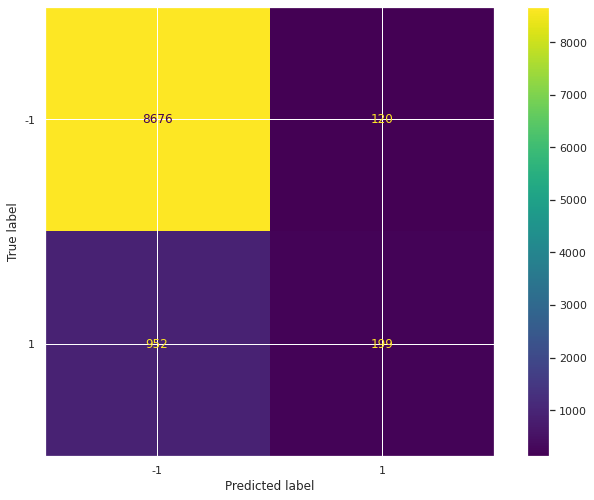

In [300]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    rid_clf,tTest,ytest)
plt.show()

Vemos que tenemos muchos datos negativos acertados, pero sin embargo muchos datos positivos en los cuales fuimos incapaces de predicir correctamente el valor de la etiqueta.

Pero aún así, con la distribución de datos desequilibrada al parecer hemos predecido un buen porcentaje de los pocos datos positivos que disponíamos.
Una manera más clara de visualizarlo es através de la curva ROC.

#### Roc Curve Ridge

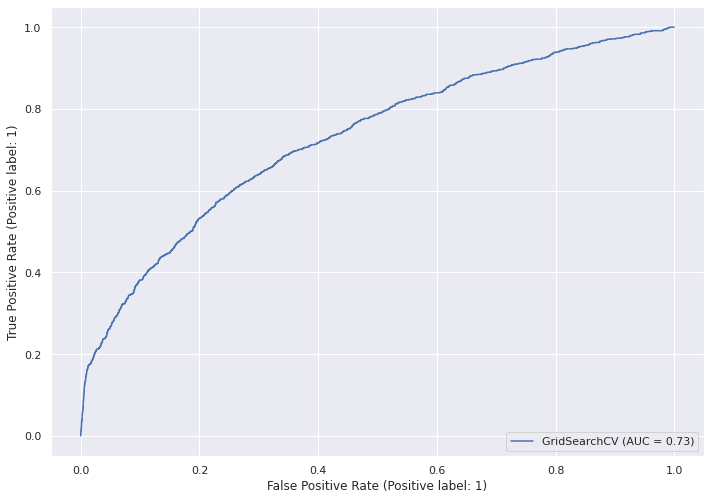

In [301]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(
    rid_clf,tTest,ytest)
plt.show()

Vemos que, seguiendo la regla de la mano definida anteriormente, nuestro modelo es apenas mediocre predeciendo las etiquetas fuera de la muestra. Yo, según lo estudiado en diversos cursos, rechazaría el modelo antes de sacarlo a producción, ya que la probabilidad de que se equivoqué y prejudique a la empresa es muy elevada.

Pero vemos que el error obtenido se parece al esperado fuera de la muestra si calculamos la cota manualmente. Sin embargo es mejor que realizemos ese estudio visualmente através de las curvas de aprendizaje del modelo: 

### Plot LC Ridge

Según la página oficial de sklearn, disponemos de una función que calcula todo lo necesario para definir las curvas de aprendizaje. La función devolvería el tamaño del grupo de entreno, el tamaño del grupo de test y ambos con sus respectivas puntuaciones y la cantidad de veces que hemos probado entrenar.

Sin embargo, al utilizar la función, me he dado cuenta de que se referían a las curvas de "early-stopping". Pero, ahora que poseo conocimiento sobre la función y como utilizar-la. Podemos añadir una métrica más a la hora de la toma de decisión sobre nuestro modelo. 

Con la función podemos definir otra función que nos dibuje fácilmente las curvas para poder analizar-las. Sin embargo, si miramos en los ejemplos que dispone sklearn, podemos encontrar una función definida que dibuja las curvas de aprendizaje [Plotting_LC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#)

##### Code LC

In [302]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


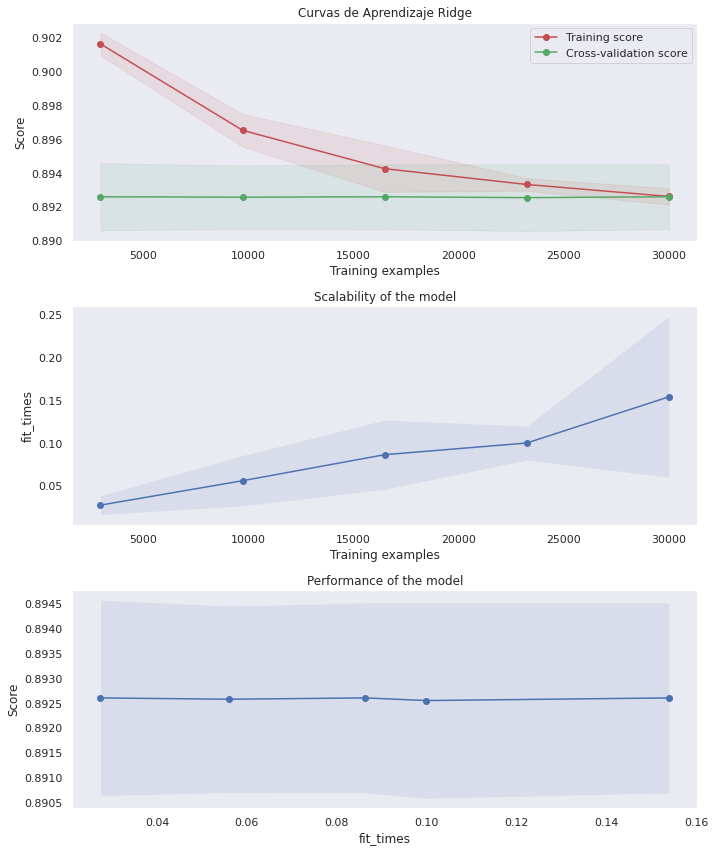

In [303]:
# Definimos las variables de matplot
fig, axes = plt.subplots(3,1,figsize=(10,12))

title = "Curvas de Aprendizaje Ridge"
# Porcentaje de veces que vamos a iterar para las curvas...
# Luego pasaremos el porcentaje del tamaño del conjunto de test y la semilla aleatoria
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
# El ylim la verdad que he ido iterando y probando
# n_jobs es la concurrencia 
ridClaf = RidgeClassifier(alpha=0.0001)
plot_learning_curve(
    ridClaf,title,tdata,ydata,axes=axes[:],cv=5,n_jobs=4
)
plt.tight_layout()
plt.show()

Vemos que nuestro modelo parece que converge rápidamente a un óptimo local debido a la distribución de los datos de nuestro conjunto de entrenamiento. Vemos que el tiempo de cómputo crece fuertemente con el tamaño de los datos y nuestro error obtenido fuera de la muestra en el conjunto de validación parece permanecer intacto. 

Además se puede observar que al parecer si tuvieramos la misma distribución, pero más grande, empezaríamos a realizar "overfitting" por como podemos observar que nuestro error dentro de la muestra empezaba a disminuir incluso por debajo del obtenido en el de validación. 

Digamos que nuestro modelo no necesita de más datos negativos si no de quizás mucho más datos positivos. Y que podríamos haber cortado el entrenamiento con la mitad de los datos. Veremos la curvas de aprendizaje. 

### Curvas de Aprendizaje Ridge

Ahora, para hacer las curvas de aprendizaje vistas en teoría...
Primeramente definimos nuestro modelo final con los mismos hiperparámetros y creamos un conjunto de entreno y otro de validación a partir de la librería sklearn que nos permite dividir un conjunto de datos en dos, como hecho anteriormente.

A continuación para un número determinado de veces, vamos a entrenar el modelo sobre un conjunto de datos cada vez más grande y vamos ir guardando los errores obtenidos. 

Utilizaremos la función de pérdida propuesta en la teoría del modelo.

In [304]:
def MSE(y,pred):
  return (np.sum((y-pred)**2))/len(y)

In [305]:
from scipy.interpolate import make_interp_spline
def learning_curve_data(clf,k,Xtrain,ytrain,test,ytest,Ein_Loss=None):
  batch_size = int(Xtrain.shape[0]/k)
  x = []
  y = []
  yt = []
  for i in range(0,Xtrain.shape[0],batch_size):
    dt = Xtrain[0:i+batch_size]
    lb = ytrain[0:i+batch_size]
    clf.fit(dt,lb)
    x.append(i+batch_size)
    if(Ein_Loss!=None):
      y.append(Ein_Loss(lb,clf.predict(dt)))
      yt.append(Ein_Loss(ytest,clf.predict(test)))
    else:
      y.append(1-clf.score(dt,lb))
      yt.append(1-clf.score(test,ytest))
  
  return x,y,yt

In [306]:
ridClaf = RidgeClassifier(alpha=0.0001)
k = 50
xrid, einrid, eoutrid = learning_curve_data(ridClaf,k,tdata,ydata,tTest,ytest,Ein_Loss=MSE)

In [307]:
def plot_slrcurve(x,y,yt):
  x_new = np.linspace(0,30000,300)
  a_BSpline = make_interp_spline(x,y)
  y_new = a_BSpline(x_new)
  plt.plot(x_new,y_new,c="blue",label='E_in')
  a_BSpline = make_interp_spline(x,yt)
  y_t = a_BSpline(x_new)
  plt.plot(x_new,y_t,c="red",label='E_out')
  plt.legend()
  plt.xlabel("Tamaño del conjunto de entrenamiento")
  plt.ylabel("Error esperado")

def plot_lrcurve(x,y,yt):
  plt.plot(x,y,c="blue",label="E_in")
  plt.plot(x,yt,c="red",label="E_out")
  plt.legend()
  plt.xlabel("Tamaño del conjunto de entrenamiento")
  plt.ylabel("Error esperado")


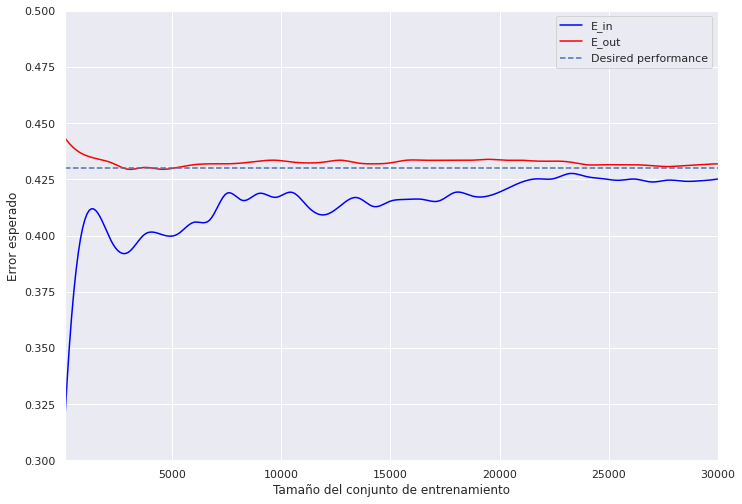

In [308]:
plot_slrcurve(xrid,einrid,eoutrid)
plt.xlim(100,30000)
plt.ylim(0.3,0.5)
plt.axhline(0.430,linestyle="--")
plt.legend(labels=["E_in","E_out","Desired performance"])
plt.show()

Vemos que realmente nuestro modelo converje a una solución que minimiza el error fuera de la muestra con nuestro conjunto de datos. El comportamiento es igual al estudiado en teoría y no hay overfitting.

El error esperado fuera de la muestra ronda los 0.45 MSE. Que es la función de pérdida empleada por este modelo que indica que tenemos un error esperado relativamente bajo. 
O también podríamos verlo en función de la tasa de aciertos que es más familiar para un problema de clasificación : 

In [309]:
k = 50
xridca, einridca, eoutridca = learning_curve_data(ridClaf,k,tdata,ydata,tTest,ytest)

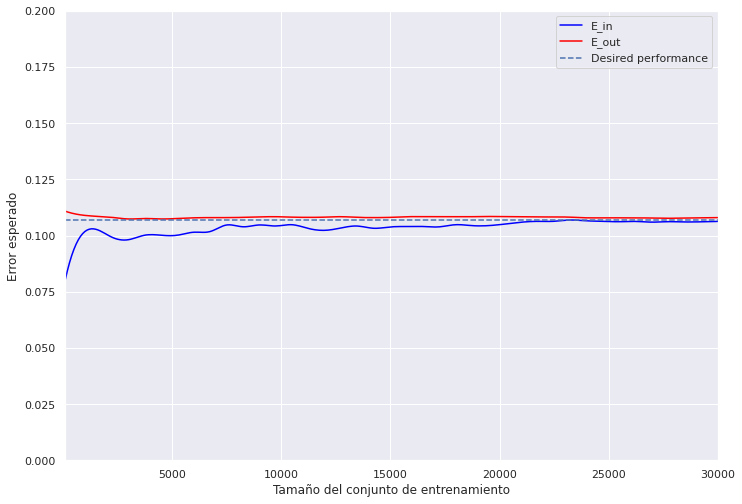

In [310]:
plot_slrcurve(xridca,einridca,eoutridca)
plt.xlim(100,30000)
plt.ylim(0.0,0.2)
plt.axhline(0.107,linestyle="--")
plt.legend(labels=["E_in","E_out","Desired performance"])
plt.show()

Dónde supone que esperariamos equivocarnos sobre el 10% de las etiquetas, pero no es una buena cota debido al la distribución de datos inicial. La idea es que podemos predecir casi con certeza todas las etiquetas negativas pero no las positivas. No hemos cumplido con nuestra misión de aprendizaje para este problema.

Las posibles soluciones serían buscar más datos respecto a las etiquetas positivas o buscar modelos que se vean menos afectados por malas distribuciones.